# Exploratory analysis of Enron data

The task here is explore the enron dataset to get a feel of the data. We should take a rough look at the different features to get their types, and some descriptive statistics from them.

Also we should see if we can take out some outliers from the dataset.

Lets start by loading the dataset to a dict and printing its keys

In [2]:
import pickle
import pprint
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
### Load the dataset and make it a dict (easy since it's a pickle):
dataset = '/Users/tvikkula/Dev/python/datascience/' +\
          'machineLearn/detect-enron-poi/final_project_dataset.pkl'
data_dict = pickle.load(open(dataset, "r") )

### Check keys of the data_dict
pprint.pprint(data_dict.keys()[0:10])

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F']


It looks like the keys are the names of each person in the dataset. Lets continue exploring the data by printing each key of a certain person.

In [3]:
print 'Feature types:\n'
for key, value in data_dict.itervalues().next().iteritems():
    print key,type(value)

Feature types:

salary <type 'int'>
to_messages <type 'int'>
deferral_payments <type 'str'>
total_payments <type 'int'>
exercised_stock_options <type 'str'>
bonus <type 'int'>
restricted_stock <type 'int'>
shared_receipt_with_poi <type 'int'>
restricted_stock_deferred <type 'str'>
total_stock_value <type 'int'>
expenses <type 'int'>
loan_advances <type 'str'>
from_messages <type 'int'>
other <type 'int'>
from_this_person_to_poi <type 'int'>
poi <type 'bool'>
director_fees <type 'str'>
deferred_income <type 'str'>
long_term_incentive <type 'str'>
email_address <type 'str'>
from_poi_to_this_person <type 'int'>


Lets format the data a bit so we can explore it easier.

In [91]:
import sys
sys.path.append('/Users/tvikkula/Dev/python/datascience/' +\
          'machineLearn/ud120-projects/tools')
sys.path.append('/Users/tvikkula/Dev/python/datascience/' +\
          'machineLearn/detect-enron-poi/')
from preprocess import *
from feature_format import featureFormat, targetFeatureSplit
features_list = getallFeatures(data_dict)
### Extract features and labels from dataset for local testing
data = featureFormat(data_dict, features_list, sort_keys = True)
# Number of features
print len(data)
# Number of POIs
print sum(map(lambda x:x[0]==1, data))
print '[(name, max, min, mean)]'
pprint.pprint(zip(features_list, data.max(axis=0), data.min(axis=0),
                  data.mean(axis=0)))

144
18
[(name, max, min, mean)]
[('poi', 1.0, 0.0, 0.125),
 ('salary', 1111258.0, 0.0, 185446.03472222222),
 ('to_messages', 15149.0, 0.0, 1238.5555555555557),
 ('deferral_payments', 6426990.0, -102500.0, 222089.55555555556),
 ('total_payments', 103559793.0, 0.0, 2259057.125),
 ('exercised_stock_options', 34348384.0, 0.0, 2075801.9791666667),
 ('bonus', 8000000.0, 0.0, 675997.35416666663),
 ('restricted_stock', 14761694.0, -2604490.0, 868536.29166666663),
 ('shared_receipt_with_poi', 5521.0, 0.0, 702.61111111111109),
 ('restricted_stock_deferred', 15456290.0, -1787380.0, 73417.902777777781),
 ('total_stock_value', 49110078.0, -44093.0, 2909785.611111111),
 ('expenses', 228763.0, 0.0, 35375.340277777781),
 ('loan_advances', 81525000.0, 0.0, 582812.5),
 ('from_messages', 14368.0, 0.0, 363.58333333333331),
 ('other', 10359729.0, 0.0, 297260.09027777775),
 ('from_this_person_to_poi', 609.0, 0.0, 24.625),
 ('director_fees', 137864.0, 0.0, 9980.3194444444453),
 ('deferred_income', 0.0, -3504

It seems there are only 144 rows in the data. That is incredibly low. It is curious to see how well can we predict poi's with a dataset this small. Out of the 144 rows, 18 are POIs.

Looking at the feature-values, the max-values of each of these variables looks massive. This is due to the fact that one of the keys in data_dict are mapped to the person 'TOTAL', which is of course an outlier. Lets also drop poi from the data as it is the dependant variable.

In [92]:
data_dict.pop('TOTAL', None)

data = featureFormat(data_dict, features_list, sort_keys = True)
features_list.remove('poi')
data = np.delete(data, 0, 1)
print '[(name, max, min, mean)]'
pprint.pprint(zip(features_list, data.max(axis=0), data.min(axis=0),
                  data.mean(axis=0)))

[(name, max, min, mean)]
[('salary', 1111258.0, 0.0, 185446.03472222222),
 ('to_messages', 15149.0, 0.0, 1238.5555555555557),
 ('deferral_payments', 6426990.0, -102500.0, 222089.55555555556),
 ('total_payments', 103559793.0, 0.0, 2259057.125),
 ('exercised_stock_options', 34348384.0, 0.0, 2075801.9791666667),
 ('bonus', 8000000.0, 0.0, 675997.35416666663),
 ('restricted_stock', 14761694.0, -2604490.0, 868536.29166666663),
 ('shared_receipt_with_poi', 5521.0, 0.0, 702.61111111111109),
 ('restricted_stock_deferred', 15456290.0, -1787380.0, 73417.902777777781),
 ('total_stock_value', 49110078.0, -44093.0, 2909785.611111111),
 ('expenses', 228763.0, 0.0, 35375.340277777781),
 ('loan_advances', 81525000.0, 0.0, 582812.5),
 ('from_messages', 14368.0, 0.0, 363.58333333333331),
 ('other', 10359729.0, 0.0, 297260.09027777775),
 ('from_this_person_to_poi', 609.0, 0.0, 24.625),
 ('director_fees', 137864.0, 0.0, 9980.3194444444453),
 ('deferred_income', 0.0, -3504386.0, -193683.27083333334),
 ('lo

The max-values are now quite a bit more reasonable. Lets now add median and std to the table:

In [93]:
print '[(name, max, min, mean, median, std)]'
pprint.pprint(zip(features_list, data.max(axis=0), data.min(axis=0),
                  np.mean(data, axis=0), np.median(data, axis=0), np.std(data, axis=0)))

[(name, max, min, mean, median, std)]
[('salary', 1111258.0, 0.0, 185446.03472222222, 210596.0, 196356.75782139692),
 ('to_messages', 15149.0, 0.0, 1238.5555555555557, 347.5, 2229.7819580055161),
 ('deferral_payments',
  6426990.0,
  -102500.0,
  222089.55555555556,
  0.0,
  751478.33357818064),
 ('total_payments',
  103559793.0,
  0.0,
  2259057.125,
  941359.5,
  8815823.5265710335),
 ('exercised_stock_options',
  34348384.0,
  0.0,
  2075801.9791666667,
  608293.5,
  4778833.0489782216),
 ('bonus', 8000000.0, 0.0, 675997.35416666663, 300000.0, 1228866.007269375),
 ('restricted_stock',
  14761694.0,
  -2604490.0,
  868536.29166666663,
  360528.0,
  2009558.2026330493),
 ('shared_receipt_with_poi',
  5521.0,
  0.0,
  702.61111111111109,
  114.0,
  1073.543626598321),
 ('restricted_stock_deferred',
  15456290.0,
  -1787380.0,
  73417.902777777781,
  0.0,
  1297454.7387758635),
 ('total_stock_value',
  49110078.0,
  -44093.0,
  2909785.611111111,
  965955.0,
  6167490.9904278889),
 ('ex

Lets plot these features to see how the descriptive stats really look like. Before doing this, lets normalize each feature in order to not distort the visualization.

The normalization function will be the following:
$$X_{normalized} = \frac{X - X_{min}}{X_{max} - X_{min}}

In [94]:
mins = np.min(data, axis=0)
maxs = np.max(data, axis=0)
data_normal = (data-mins)/(maxs-mins)

After normalizing the data, lets make it a pandas dataframe

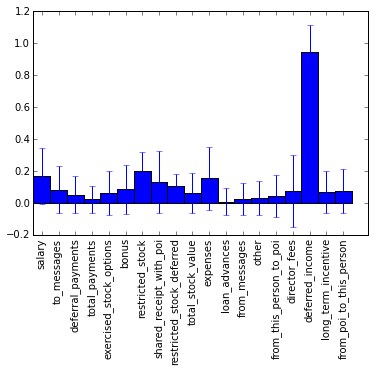

In [95]:
plt.figure()
plt.bar(np.arange(19), np.mean(data_normal, axis=0), 1,
        yerr=np.std(data_normal, axis=0))
plt.xticks(np.arange(0.5, 19, 1), features_list, rotation=90)
plt.show()

It should be noted that the normalized data was used to make it easier to visualize each feature in the same plot.

Most of the mean-values are quite low, but the std's are a bit high. The deferred incomes seem quite high across the board.

Lets see if the values differ on pois:

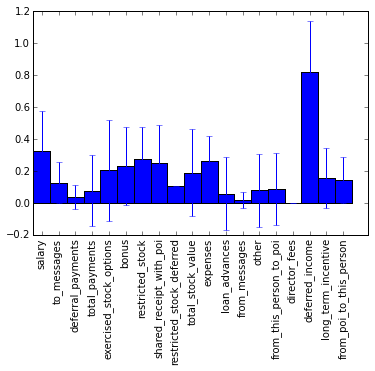

In [103]:
poidata = featureFormat(data_dict, getallFeatures(data_dict), sort_keys = True)

# filter out non-pois:
poidata = filter(lambda x: x[0] == 1, poidata)
# delete poi-field

poidata = np.delete(poidata, 0, 1)

# scale
mins = np.min(data, axis=0)
maxs = np.max(data, axis=0)
poidata_normal = (poidata-mins)/(maxs-mins)

# plot
plt.figure()
plt.bar(np.arange(19), np.mean(poidata_normal, axis=0), 1,
        yerr=np.std(poidata_normal, axis=0))
plt.xticks(np.arange(0.5, 19, 1), features_list, rotation=90)
plt.show()

Note that the scaling was done on the value-space of all features to prevent scaling differences between plots.

The chart does look a bit different for pois. Many of the values seem slightly higher for pois.

Lets look at the deferred income distribution:

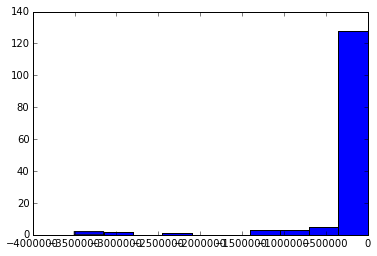

In [61]:
plt.figure()
plt.hist(data[:,16])
plt.show()

It seems the majority of the values are 0, which means that the normalization of the values in the previous chart tricked the interpretation.

Lets build a hist of salary:

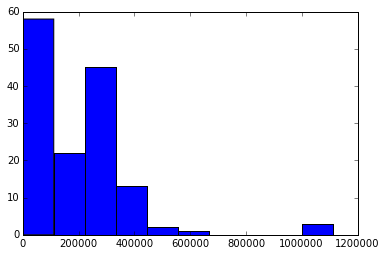

In [60]:
plt.figure()
plt.hist(data[:,0])
plt.show()

There are a lot of people with low salaries

In [54]:
deadbeats = 0
for key, value in data_dict.iteritems():
    if value['salary'] == 'NaN':
        deadbeats = deadbeats + 1
    elif value['salary'] < 1000 or value['salary'] > 800000:
        print key, value['salary']
print 'deadbeats: ' + str(deadbeats)

BANNANTINE JAMES M 477
LAY KENNETH L 1072321
SKILLING JEFFREY K 1111258
FREVERT MARK A 1060932
deadbeats: 51


Out of the 144 datarows, 51 has no salary. The fact that so many data have no salary will be difficult when creating the learning model. Since so many of the dataset have no salary-data, they are difficult to omit from data (as that would omit 35% of our data).

Lay, Skilling, and Frevert have very high salaries that clearly stand out from the rest.

Lets look at the null-values in our other features:

In [110]:
nans = {}
nancount = 0
for key, value in data_dict.iteritems():
    for subkey in value.keys():
        if value[subkey] == 'NaN':
            nancount = nancount + 1
            if not subkey in nans.keys():
                nans[subkey] = 1
            else:
                nans[subkey] = nans[subkey] + 1
print nancount
pprint.pprint(nans)

1352
{'bonus': 64,
 'deferral_payments': 107,
 'deferred_income': 97,
 'director_fees': 129,
 'email_address': 34,
 'exercised_stock_options': 44,
 'expenses': 51,
 'from_messages': 59,
 'from_poi_to_this_person': 59,
 'from_this_person_to_poi': 59,
 'loan_advances': 142,
 'long_term_incentive': 80,
 'other': 53,
 'restricted_stock': 36,
 'restricted_stock_deferred': 128,
 'salary': 51,
 'shared_receipt_with_poi': 59,
 'to_messages': 59,
 'total_payments': 21,
 'total_stock_value': 20}


So many NaN's. 1352 in total. And quite a few in all features. There is really no way to rem